In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
df=pd.read_csv("Documents/Height-Weight Data - Height-Weight Data (1).csv",sep=",")
df.head(5)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


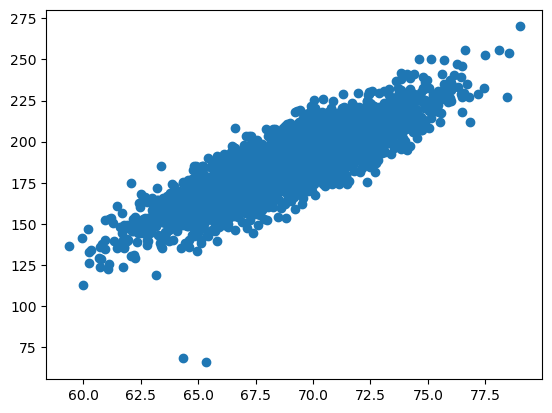

In [22]:
plt.scatter(df.Height, df.Weight)

Text(0.5, 1.0, 'Height-Weight Prediction')

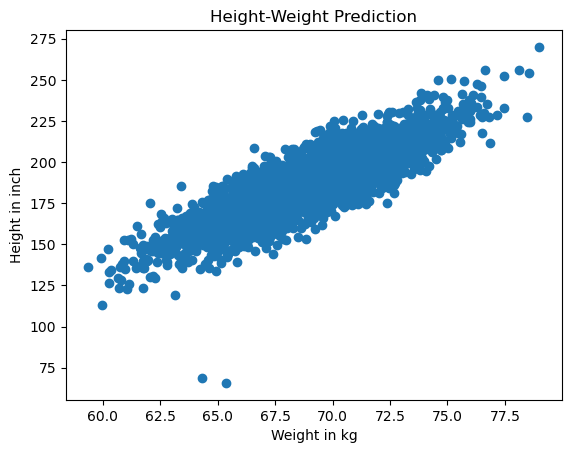

In [23]:
plt.scatter(df[['Height']] , df[['Weight']]) 
plt.ylabel('Height in inch')
plt.xlabel('Weight in kg')
plt.title('Height-Weight Prediction')

Text(0.5, 1.0, 'Height-Weight Prediction')

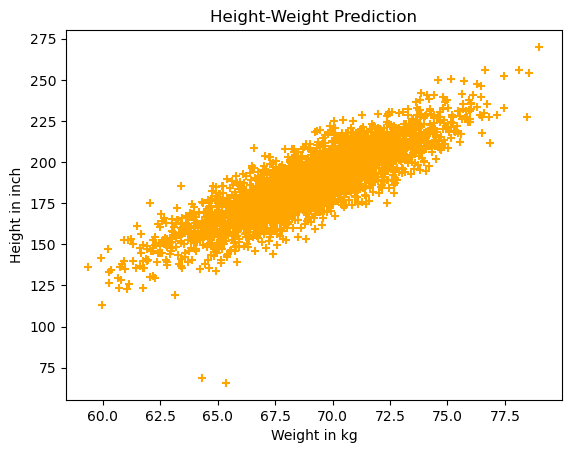

In [24]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(df[['Height']] , df[['Weight']], color='orange', marker='+')
plt.ylabel('Height in inch')
plt.xlabel('Weight in kg')
plt.title('Height-Weight Prediction')

In [25]:
df.Height.mean()

69.02441087268781

In [26]:
df.Weight.mean()

186.891257979463

In [27]:
#x = df[['area']] #2d
y = df[['Weight']]

In [28]:
x = df.drop('Weight', axis=1) #axis=1 means column, 0 means row

In [29]:
x.head() 

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [30]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [31]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [32]:
#splitting dataset into train and test set
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split as tts

In [34]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.33, random_state=1)

In [35]:
xtrain.head()

,Height
166,66.262820
1011,71.738695
1344,67.750330
1563,71.690869
476,68.515523


In [36]:
ytrain.head()

,Weight
166,162.779583
1011,185.842622
1344,179.115883
1563,188.656335
476,176.141239


In [37]:
xtest.head()

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [38]:
ytest.head()

,Weight
719,192.672676
2296,187.491501
3083,191.563495
1296,177.909685
2234,165.313807


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
reg=LinearRegression() # creating linear regression object

In [41]:
reg.fit(xtrain, ytrain) #training model

LinearRegression()

In [42]:

reg.predict([[2000]])

array([[11669.78254752]])

In [43]:
m = reg.coef_

In [44]:
c = reg.intercept_

In [45]:
c

array([-223.73384719])

In [46]:
m

array([[5.9467582]])

In [49]:
predicted = (m*2000) + c
predicted

array([[11669.78254752]])

In [50]:
predicted = (m*2000) + c
predicted

array([[11669.78254752]])

In [51]:
reg.predict(xtest)

array([[177.09443165],
       [189.92284867],
       [167.62178605],
       ...,
       [179.20146692],
       [198.1912708 ],
       [190.70609708]])

In [52]:
df2 = df.copy()

In [48]:
df2.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [53]:
df2['predicted'] = reg.predict(df[['Height']])

In [54]:
df2.head()

,Height,Weight,predicted
0,73.847017,241.893563,215.416507
1,68.781904,162.310473,185.295505
2,74.110105,212.740856,216.981030
3,71.730978,220.042470,202.832937
4,69.881796,206.349801,191.836295


In [55]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0.5, 1.0, 'Height-Weight Prediction')

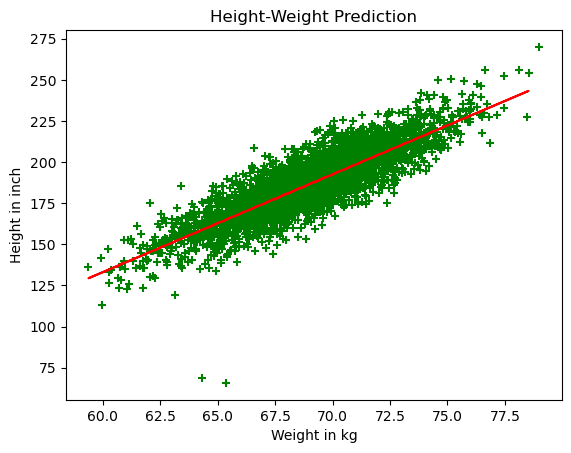

In [56]:
plt.scatter(df[['Height']] , df[['Weight']], color='green', marker='+')
plt.plot(xtest, reg.predict(xtest), color='red') # reg.predict(xtest) = m*xtest + c
plt.ylabel('Height in inch')
plt.xlabel('Weight in kg') 
plt.title('Height-Weight Prediction')

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [58]:
#testing MSE
test_mse = mean_squared_error(ytest, reg.predict(xtest)) #ytest is actual y, reg.predict(xtest) is actually predicted y
test_mse

111.14654406073984

In [59]:
#testing MAE
test_mse = mean_absolute_error(ytest, reg.predict(xtest))
test_mse

8.29430074943638

In [60]:
#trainin MSE
train_mse = mean_squared_error(ytrain, reg.predict(xtrain))
train_mse

103.48759292384861

In [61]:
#trainin MAE
train_mse = mean_absolute_error(ytrain, reg.predict(xtrain))
train_mse

7.9554884524224185

In [63]:
reg.score(xtest, ytest) # Testing accuracy

0.7332431736613305

In [64]:
reg.score(xtrain, ytrain) # Training accuracy

0.7317716240073282

In [65]:
import joblib, pickle

In [67]:
pickle.dump(reg, open('Machine learning project1','wb')) # saving ml model ; wb -> write binary

In [68]:
model2 = pickle.load(open('Machine learning project1','rb'))

In [69]:
model2

LinearRegression()